<a href="https://colab.research.google.com/github/alejandradz98/PDI/blob/master/interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTERPOLACION Y TRANSFORMACIONES


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

import os
path='/content/drive/My Drive/PDI/'
os.chdir(path)

In [0]:
def displayGray3(a,b,c, title1 = 'Original', title2= 'Editado', title3= 'Editado'):
    plt.figure(figsize=(3,3))
    plt.subplot(131), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(c, cmap='gray'), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def displayGray2(a,b, title1 = 'Original', title2= 'Editado'):
    plt.figure(figsize=(10,10))
    plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def displayColor3(a,b,c, title1 = 'Original', title2= 'Editado', title3= 'Editado'):
    plt.figure(figsize=(10,10))
    plt.subplot(131), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(c), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def displayColor2(a,b, title1 = 'Original', title2= 'Editado'):
    plt.figure(figsize=(10,10))
    plt.subplot(131), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def readRGB(imgPath):
  img= cv2.imread(imgPath)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img

Interpolacion Nearest Neighbour


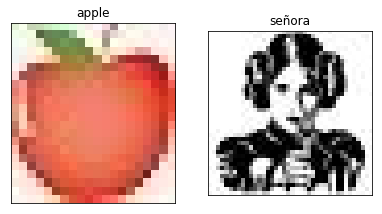

In [8]:
imgA = readRGB('apple20x22.jpg')
imgM = readRGB('ico.jpg')
near_imgA=cv2.resize(imgA, None, fx=5, fy=5, interpolation= cv2.INTER_NEAREST)
near_imgM=cv2.resize(imgM, None, fx=5, fy=5, interpolation= cv2.INTER_NEAREST)
displayColor2(near_imgA, near_imgM, 'apple','señora')

 Interpolacion Bilinear

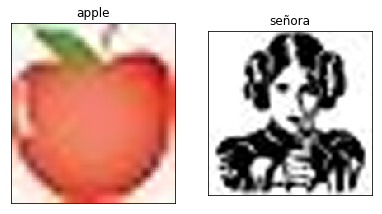

In [11]:
imgA = readRGB('apple20x22.jpg')
imgM = readRGB('ico.jpg')
bili_imgA=cv2.resize(imgA, None, fx=5, fy=5, interpolation= cv2.INTER_LINEAR)
bili_imgM=cv2.resize(imgM, None, fx=5, fy=5, interpolation= cv2.INTER_LINEAR)
displayColor2(near_imgA, near_imgM, 'apple','señora')

Interpolacion Bicubica

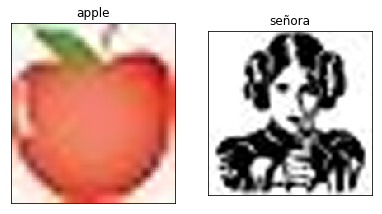

In [12]:
imgA = readRGB('apple20x22.jpg')
imgM = readRGB('ico.jpg')
bicu_imgA=cv2.resize(imgA, None, fx=5, fy=5, interpolation= cv2.INTER_CUBIC)
bicu_imgM=cv2.resize(imgM, None, fx=5, fy=5, interpolation= cv2.INTER_CUBIC)
displayColor2(near_imgA, near_imgM, 'apple','señora')

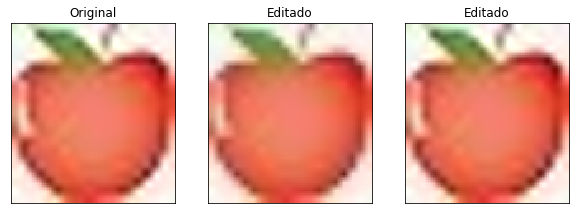

In [13]:
displayColor3(near_imgA, bili_imgA, bicu_imgA)

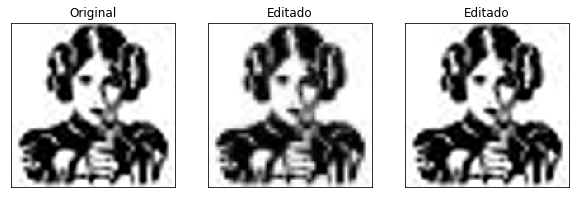

In [14]:
displayColor3(near_imgM, bili_imgM, bicu_imgM)

OTROS ALGORITMOS DE INTERPOLACION

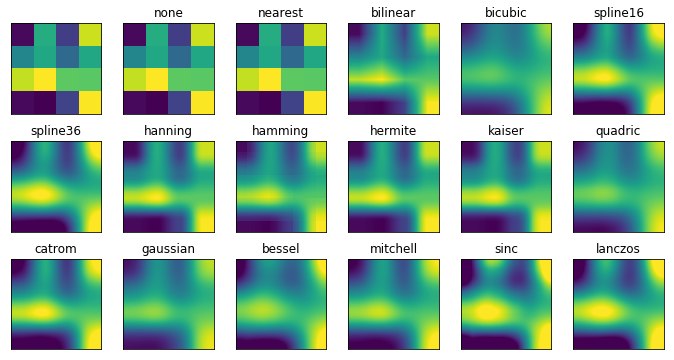

In [20]:
methods = [None, 'none','nearest','bilinear', 'bicubic','spline16','spline36','hanning','hamming','hermite','kaiser','quadric','catrom','gaussian','bessel','mitchell','sinc','lanczos']
grid= np.random.rand(4,4)
#grid=imgM

fig, axes=plt.subplots(3, 6, figsize=(12,6),
                      subplot_kw={'xticks':[], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace= 0.05)

for ax, interp_method in zip(axes.flat, methods):
  ax.imshow(grid, interpolation=interp_method)
  ax.set_title(interp_method)
  
plt.show()

Negativo de una imagen a color


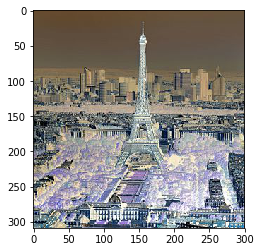

In [21]:
from PIL import Image #libreria

foto= Image.open('paris.jpg')#cargando imagen RGB
datos= list(foto.getdata())
datos_invertidos= [(255-datos[x][0], 255- datos[x][1], 255-datos[x][2]) for x in range(len(datos))]
imagen_invertida = Image.new('RGB', foto.size)
imagen_invertida.putdata(datos_invertidos)
#imagen_invertida.save('playa2.jpg')
plt.imshow(np.asarray(imagen_invertida))#convertir a un arreglo

Negativo de una imagen en escala de gris

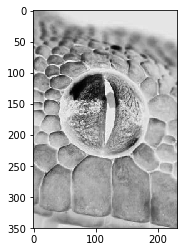

In [22]:
from PIL import Image #libreria

foto= Image.open('ojo.jpg')#cargando imagen RGB
datos= list(foto.getdata())
datos_invertidos= [255-x for x in datos]
imagen_invertida = Image.new('L', foto.size)
imagen_invertida.putdata(datos_invertidos)
#imagen_invertida.save('ojo.jpg')
plt.imshow(np.asarray(imagen_invertida),cmap='gray')#convertir a un arreglo

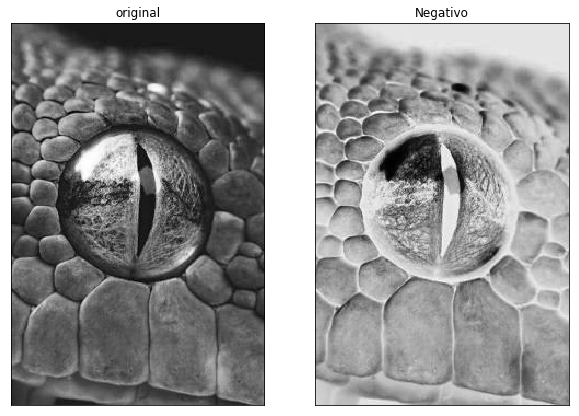

In [27]:
def negative(l):
  #cargar imagenes
  img =cv2.imread('ojo.jpg',cv2.IMREAD_GRAYSCALE)
  rows, columns = img.shape
  img2 = np.zeros((rows, columns), dtype= np.uint8)
  for x in range(rows):
    for y in range(columns):
      img2[x,y]= (l-1)- img[x,y]
    
  displayGray2(img,img2,'original','Negativo')
  return

negative(256)

Transformacion logaritmica

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


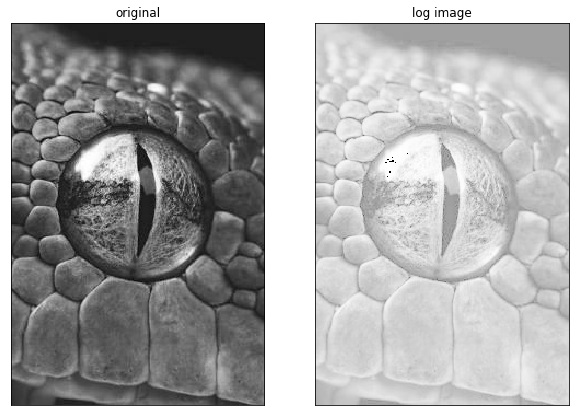

In [28]:
import cv2
import numpy as np
#cargar imagen
img= cv2.imread('ojo.jpg')
#aplicar trnsformacion logaritmica
img_log=(np.log(img+1)/(np.log(1+np.max(img))))*255
#especificar tipo de dato
img_log=(np.array(img_log,dtype=np.uint8))
#mostrar imagen
displayGray2(img,img_log,'original','log image')